In [7]:
import math
import random
import time

import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate

In [8]:
def integra_mc(fun, a, b, num_puntos=10000):
    I, _ = integrate.quad(fun, a, b)
    return I

In [9]:
def bucle_integra_mc(fun, a, b, num_puntos=10000):
    M = max(
        [
            fun(x)
            for x in [
                num_punto * (b - a) / num_puntos + a for num_punto in range(num_puntos)
            ]
        ]
    )
    N_debajo = sum(
        [
            y < fun(x)
            for x, y in zip(
                [random.uniform(a, b) for _ in range(num_puntos)],
                [random.uniform(0, M) for _ in range(num_puntos)],
            )
        ]
    )
    N_total = num_puntos
    I = N_debajo / N_total * (b - a) * M
    return I

In [ ]:
def vector_integra_mc(fun, a, b, num_puntos=10000):
    M = np.max(fun(np.linspace(a, b, num=num_puntos)))
    N_debajo = np.sum(
        np.random.default_rng().uniform(low=0, high=M, size=num_puntos)
        < fun(np.random.default_rng().uniform(low=a, high=b, size=num_puntos))
    )
    N_total = num_puntos
    I = N_debajo / N_total * (b - a) * M
    return I

In [11]:
def compara_tiempos_integra_mc():
    fun = lambda x: 1 - (2 / math.pi * x - 1) ** 2
    a = 0
    b = math.pi

    sizes = np.linspace(100, 10000000, 20)

    I_integra_mc = 0
    I_bucle_integra_mc = 0
    I_vector_integra_mc = 0

    times_bucle_integra_mc = []
    times_vector_integra_mc = []

    for i, size in enumerate(sizes):
        num_puntos = int(size)

        I = integra_mc(fun, a, b, num_puntos=num_puntos)
        I_integra_mc += (I - I_integra_mc) / (i + 1)

        tic = time.process_time()
        bucle_I = bucle_integra_mc(fun, a, b, num_puntos=num_puntos)
        toc = time.process_time()
        I_bucle_integra_mc += (bucle_I - I_bucle_integra_mc) / (i + 1)
        times_bucle_integra_mc += [1000 * (toc - tic)]

        tic = time.process_time()
        vector_I = vector_integra_mc(fun, a, b, num_puntos=num_puntos)
        toc = time.process_time()
        I_vector_integra_mc += (vector_I - I_vector_integra_mc) / (i + 1)
        times_vector_integra_mc += [1000 * (toc - tic)]

    print(f"I: {I_integra_mc}")
    print(f"bucle_I: {I_bucle_integra_mc}")
    print(f"vector_I: {I_vector_integra_mc}")

    X = np.linspace(a, b)
    Y = fun(X)
    plt.plot(X, Y)
    plt.show()

    plt.scatter(sizes, times_bucle_integra_mc, c="red", label="bucle_times")
    plt.scatter(sizes, times_vector_integra_mc, c="blue", label="vector_times")
    plt.legend()
    plt.show()

I: 2.094395102393195
bucle_I: 2.0966050666310756
vector_I: 2.088324611471301


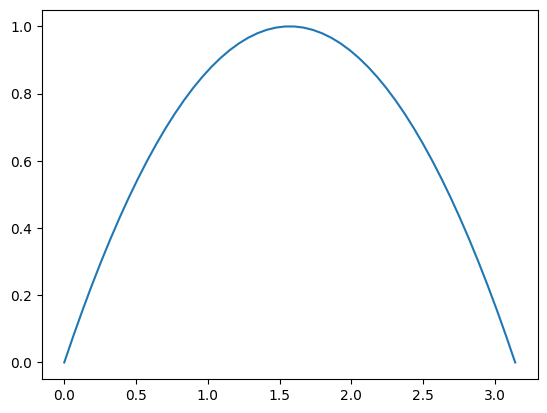

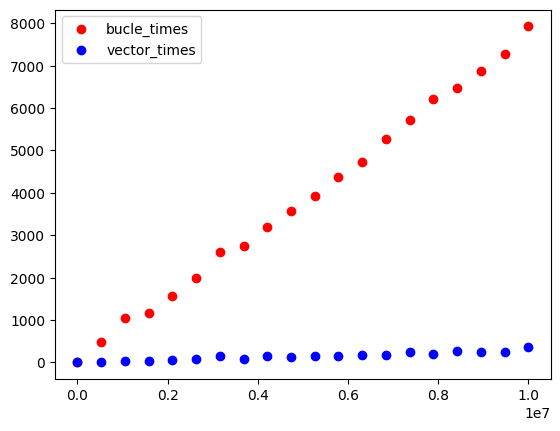

In [12]:
compara_tiempos_integra_mc()